In [2]:
# Steps
# 1: X Input Image
# 2: X input spline coords
# 3. X Plot parametric lines on image
# 4. Define intensity of warp by shortening length of spline
#    Factor of 'intensity' in x and y direction

In [2]:
import cv2 

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('englishmansbay.jpg')

if img is None:
    print('Could not open or find the image: ', args.input1)
    exit(0)

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [5]:
# Spleen 1
s1p1 = [3115, 1910];
s1p2 = [2919, 1826];
s1p3 = [2815, 1794];
s1p4 = [2671, 1750];
s1p5 = [2499, 1722];
s1p6 = [2351, 1698];

sl_x = [s1p1[0], s1p2[0], s1p3[0], s1p4[0], s1p5[0], s1p6[0]];
sl_y = [s1p1[1], s1p2[1], s1p3[1], s1p4[1], s1p5[1], s1p6[1]];

sl = np.column_stack((sl_x, sl_y));

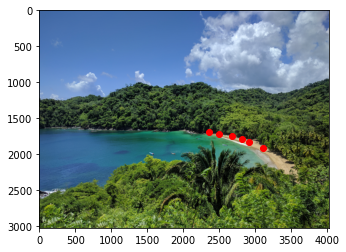

In [6]:
# Plot Spleen on image
plt.plot(sl_x, sl_y, 'o', color="red")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# Spline can be represented as set of parametric equations
# Fit line to x coordinates
# Polyfit returns polynomial (of specified degrees) coefficients for a set of points 
# Poly1d(polynomial_coefficients) evaluates a polynomial with the given coefficients
t = [1, 2, 3, 4, 5, 6]

coefficients_x = np.polyfit(t, sl_x, 2);
p_x = np.poly1d(coefficients_x);

In [8]:
# Fit line to y coordinates
coefficients_y = np.polyfit(t, sl_y, 2);
p_y = np.poly1d(coefficients_y);

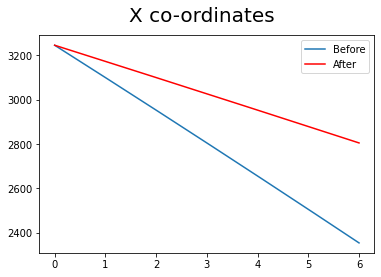

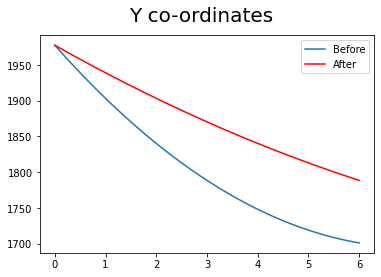

In [44]:
# Plot x and y coordinates as parametric equations
n=200
offset = 1;
t = np.linspace(0, 6, n)

# Calculate spline coordinates after shrink
Xp = p_x(t/2)# +(offset * np.arange(n))
Yp = p_y(t/2)#+(offset * np.arange(n))

fig = plt.figure()
plt.plot(t, p_x(t), '-', label='Before')
plt.plot(t, Xp, '-', label='After', color='red')

fig.suptitle('X co-ordinates', fontsize=20)
plt.legend()
plt.show()

fig = plt.figure()
plt.plot(t, p_y(t), '-', label='Before')
plt.plot(t, Yp, '-', label='After', color='red')

fig.suptitle('Y co-ordinates', fontsize=20)
plt.legend()
plt.show()

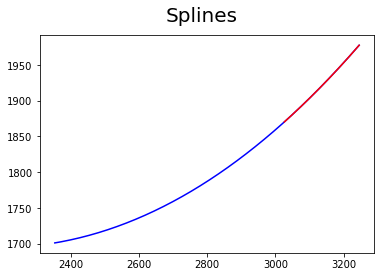

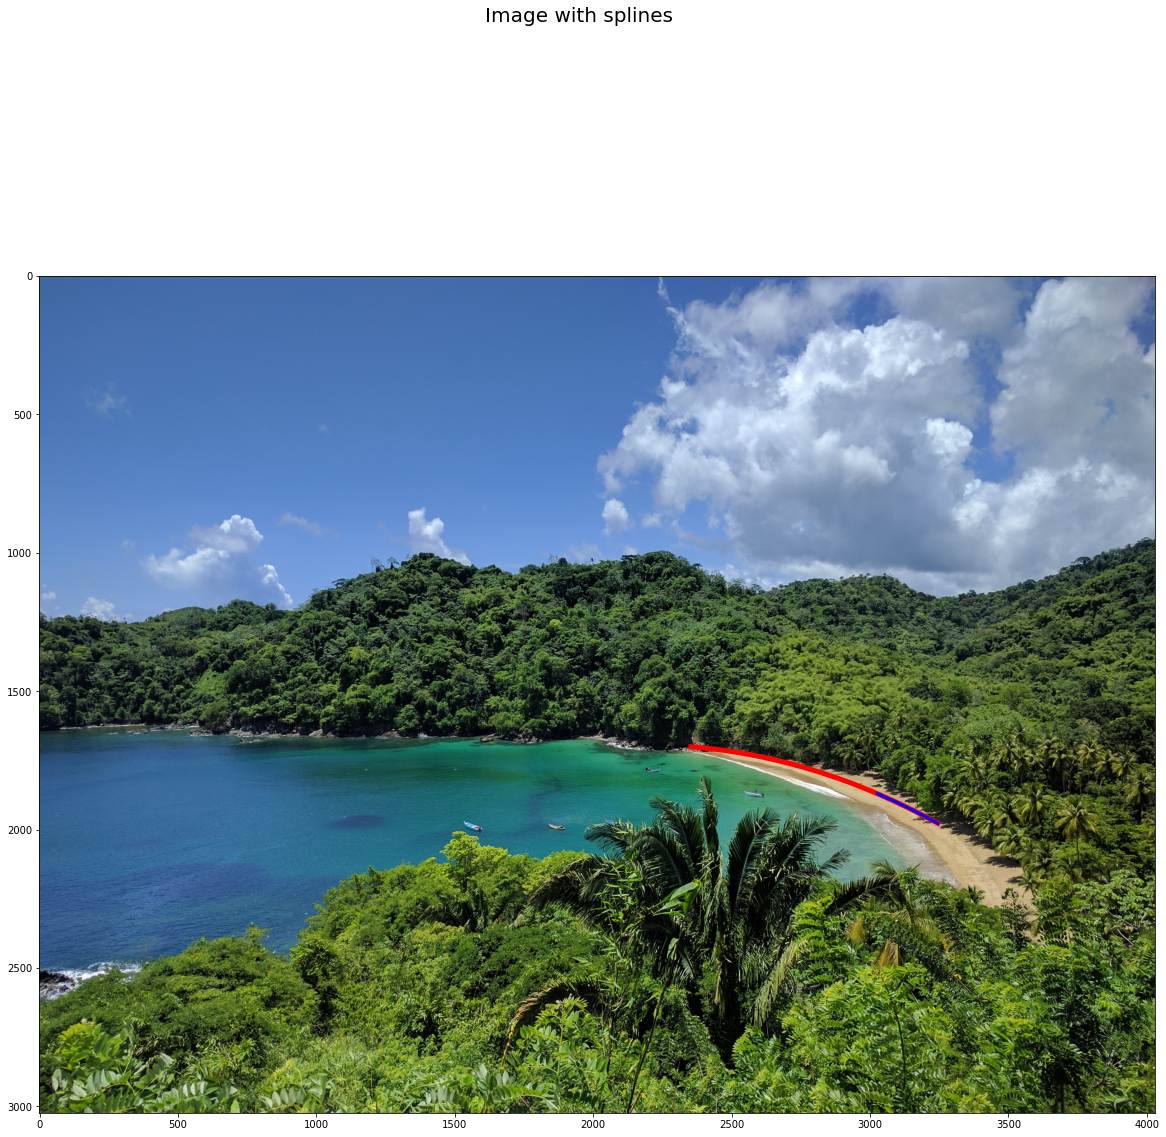

In [48]:
# Find new spline
n=200
factor = .25
offset = 1;
t = np.linspace(0, 6, n)

Xp = p_x(t * factor)#+(offset * np.arange(n))
Yp = p_y(t * factor)#+(offset * np.arange(n))

fig1 = plt.figure()
new_spline = np.column_stack((Xp, Yp));
plt.plot(p_x(t), p_y(t), '-', color='blue')
plt.plot(Xp, Yp, '-', color='red')

fig1.suptitle('Splines', fontsize=20)
plt.show()

# Plot Spline on image
fig2 = plt.figure(figsize=(20,20))
plt.plot(p_x(t), p_y(t), '-', color="red", linewidth=5)
plt.plot(Xp, Yp, '-', color="blue", linewidth=3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
fig2.suptitle('Image with splines', fontsize=20)
plt.show()

In [72]:
def get_new_spline(old_spline, factor, no_of_points):
    # This function takes the x and y coordinate parametric equations as polynomials, px() and py()
    # It also takes a shrinking factor which must be between 0 and 1
    # Specify number of points in new spline with no_of_points
    if factor > 1 or factor < 0:
        print("Factor must be between 0 and 1")
        return -1
    
    # Get number of points in spline
    t = np.linspace(0,6, old_spline.shape[0])
    
    # Deconstruct spline coordinates
    x = old_spline[:,0]
    y = old_spline[:,1]
    
    # Calculate Parametirc equation for spline
    # Fit line to x coords
    coefficients_x = np.polyfit(t, x, 2);
    p_x = np.poly1d(coefficients_x);
    
    # Fit line to y coords
    coefficients_y = np.polyfit(t, y, 2);
    p_y = np.poly1d(coefficients_y);
    
    output_t = np.linspace(0, 6, no_of_points)
    
    # Calculate new spline coordinates
    Xp = p_x(output_t * factor)
    Yp = p_y(output_t * factor)
    
    # Return new spline
    return np.column_stack((Xp, Yp));
    
    
    

In [73]:
# Test new spline function
n_spline = get_new_spline(sl, .5, 200)

n_spline
# # Plot Spline on image
# fig2 = plt.figure(figsize=(20,20))
# plt.plot(p_x(t), p_y(t), '-', color="red", linewidth=5)
# plt.plot(Xp, Yp, '-', color="blue", linewidth=3)

# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# fig2.suptitle('Image with splines', fontsize=20)
# plt.show()

array([[3099.57142857, 1903.28571429],
       [3097.73214241, 1902.42389848],
       [3095.89267587, 1901.56386383],
       [3094.05302896, 1900.70561034],
       [3092.21320169, 1899.84913801],
       [3090.37319404, 1898.99444684],
       [3088.53300602, 1898.14153683],
       [3086.69263763, 1897.29040798],
       [3084.85208887, 1896.44106029],
       [3083.01135974, 1895.59349376],
       [3081.17045024, 1894.74770839],
       [3079.32936037, 1893.90370418],
       [3077.48809013, 1893.06148113],
       [3075.64663951, 1892.22103924],
       [3073.80500853, 1891.38237851],
       [3071.96319718, 1890.54549894],
       [3070.12120545, 1889.71040053],
       [3068.27903336, 1888.87708328],
       [3066.43668089, 1888.04554719],
       [3064.59414806, 1887.21579226],
       [3062.75143485, 1886.38781849],
       [3060.90854127, 1885.56162588],
       [3059.06546732, 1884.73721443],
       [3057.222213  , 1883.91458414],
       [3055.37877831, 1883.09373501],
       [3053.53516325, 18

In [57]:
sl

array([[3115, 1910],
       [2919, 1826],
       [2815, 1794],
       [2671, 1750],
       [2499, 1722],
       [2351, 1698]])

In [22]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[rows, cols] = img_gray.shape

# Create image-size matrixes for x coordinates and y coordinates
X_COORD_MATRIX = np.ones((rows,1)) * np.arange(1,cols+1)

rows_range = np.arange(1,rows+1)[:, np.newaxis]
Y_COORD_MATRIX = rows_range * np.ones(cols)


# coords = [X(:)'; Y(:)'];